# Oilsands analysis

An exploratory analysis of Environment Canada's Open Government Data about the environmental trends within the Oilsands of Alberta. This is a data analysis on the Open Government Oil Sands data from Environment Canada. I will be going through my though processes along the way

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.dates as mdates

## FISH HEALTH
' ' means no data was collected, '?' so far as I can tell is meaningless. 'x' means sample collected but not measured.

In [2]:
#Get all path pertaining to Wildish health
data_dir = 'data/OilSands/WildFishHealth/'
paths = os.listdir(data_dir)

#### Perform data exploration  on the Various Species
In this section we explore the health of Trout Perch within the Oil Sands Region. I chose this particular species because it had the most data to work with. My initial thoughts was to visualize the data as though I had been collecting it. Therefore I did a naive visualization based on date. My primary interest was on the potential effect the Oil Sands could have on it's reproductive habits. 

In [59]:
FishHealth = pd.read_csv(data_dir + paths[-2])
FishHealth.index = np.arange(len(FishHealth))
FishHealth['Gonad Weight (g)'] = FishHealth['Gonad Weight (g)'].replace({' ': None, '-':None, 'x':None, '?':None})
FishHealth['Sex'] = FishHealth['Sex (M=Male; F=Female; I=Indeterminate; IM=Immature Male; IF=Immature Female)']
FishHealth['Date'] = FishHealth['Date (yyyy-mm-dd)']
FishHealth['Date'] = pd.to_datetime(FishHealth['Date'])
FishHealth = FishHealth.drop(['Sex (M=Male; F=Female; I=Indeterminate; IM=Immature Male; IF=Immature Female)' , 'Date (yyyy-mm-dd)'], axis=1)
dates = FishHealth['Date'].unique()
FishHealth['Gonad Weight (g)'] = pd.to_numeric(FishHealth['Gonad Weight (g)'])

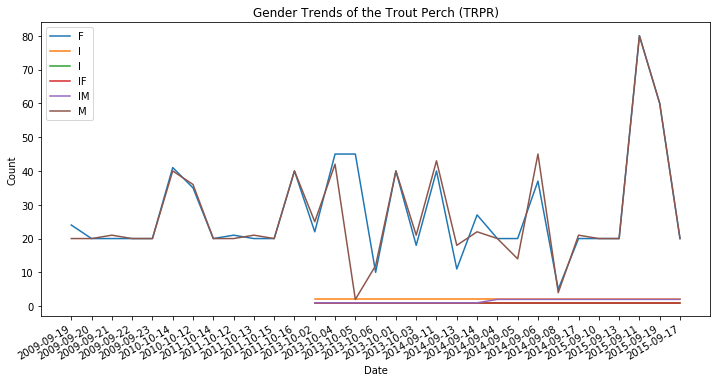

In [34]:
#Clean Sex data
sex = FishHealth.groupby(['Date', 'Sex']).count()
sex['Count'] = sex['Species']
sex = sex.reset_index()

#Visualize Sex Data
plt.rcParams['figure.figsize'] = [12, 6]
fig, ax = plt.subplots(nrows = 1, ncols = 1)
for key, grp in sex.groupby(['Sex']):  
    grp = pd.DataFrame(dates, columns=['Date']).merge(grp, how='left',on='Date')
    grp = grp.fillna(method='ffill')
    ax.plot(grp['Date'], grp['Count'], label=key) 

fig.autofmt_xdate()
ax.set_title('Gender Trends of the ' + FishHealth.iloc[0]["Species"])
ax.set_xlabel('Date')
ax.set_ylabel('Count')
plt.legend(loc='best')    
plt.show()

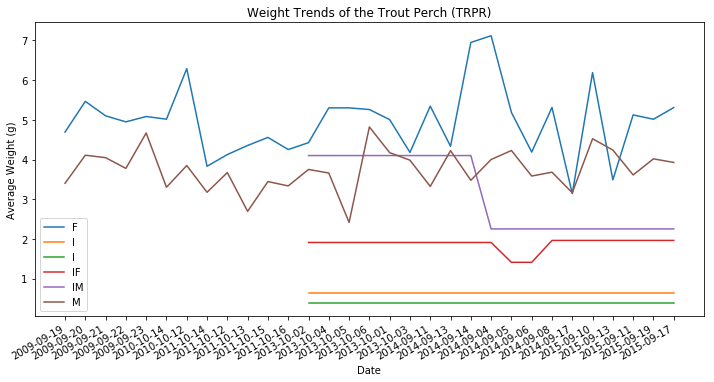

In [35]:
#Generate weight data
weight = FishHealth.groupby(['Date', 'Sex'])['Total Weight (g)'].mean()
weight = weight.reset_index()

#Visalize weight data
plt.rcParams['figure.figsize'] = [12, 6]
fig, ax = plt.subplots(nrows = 1, ncols = 1)
for key, grp in weight.groupby(['Sex']):  
    grp = pd.DataFrame(dates, columns=['Date']).merge(grp, how='left',on='Date')
    grp = grp.fillna(method='ffill')
    ax.plot(grp['Date'], grp['Total Weight (g)'], label=key) 

fig.autofmt_xdate()
ax.set_title('Weight Trends of the ' + FishHealth.iloc[0]["Species"])
ax.set_xlabel('Date')
ax.set_ylabel('Average Weight (g)')
plt.legend(loc='best')    
plt.show()

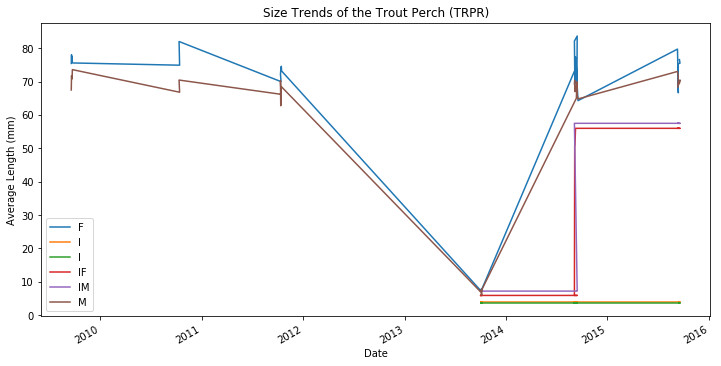

In [61]:
#Generate Length data
weight = FishHealth.groupby(['Date', 'Sex'])['Length (mm)'].mean()
weight = weight.reset_index()

#Visalize weight data
plt.rcParams['figure.figsize'] = [12, 6]
fig, ax = plt.subplots(nrows = 1, ncols = 1)
for key, grp in weight.groupby(['Sex']):  
    grp = pd.DataFrame(dates, columns=['Date']).merge(grp, how='left',on='Date')
    grp = grp.fillna(method='ffill')
    ax.plot(grp['Date'], grp['Length (mm)'], label=key) 

fig.autofmt_xdate()
ax.set_title('Size Trends of the ' + FishHealth.iloc[0]["Species"])
ax.set_xlabel('Date')
ax.set_ylabel('Average Length (mm)')
plt.legend(loc='best')    
plt.show()

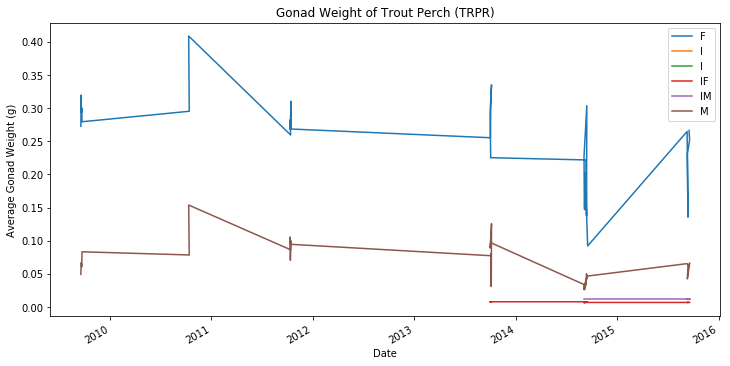

In [62]:
#Generate Length data
weight = FishHealth.groupby(['Date', 'Sex'])['Gonad Weight (g)'].mean()
weight = weight.reset_index()

#Visalize weight data
plt.rcParams['figure.figsize'] = [12, 6]
fig, ax = plt.subplots(nrows = 1, ncols = 1)
for key, grp in weight.groupby(['Sex']):  
    grp = pd.DataFrame(dates, columns=['Date']).merge(grp, how='left',on='Date')
    grp = grp.fillna(method='ffill')
    ax.plot(grp['Date'], grp['Gonad Weight (g)'], label=key) 

fig.autofmt_xdate()
ax.set_title('Gonad Weight of ' + FishHealth.iloc[0]["Species"])
ax.set_xlabel('Date')
ax.set_ylabel('Average Gonad Weight (g)')
plt.legend(loc='best')    
plt.show()

In [68]:
FishHealth.columns

Index(['Site Name', 'Waterbody Name', 'Site & Description', 'Reach Code',
       'Latitude (Decimal Degrees)', 'Longitude Decimal Degrees)', 'Species',
       'Fish ID ', 'Length (mm)', 'Total Weight (g)', 'Age - Otolith',
       'Age - # of Otolith(s)', 'Age - Years', 'Gonad Weight (g)',
       'Liver Weight (g)', 'Liver (Mixed-Function Oxygenase [MFO])', 'NOTES',
       'Sex', 'Date'],
      dtype='object')

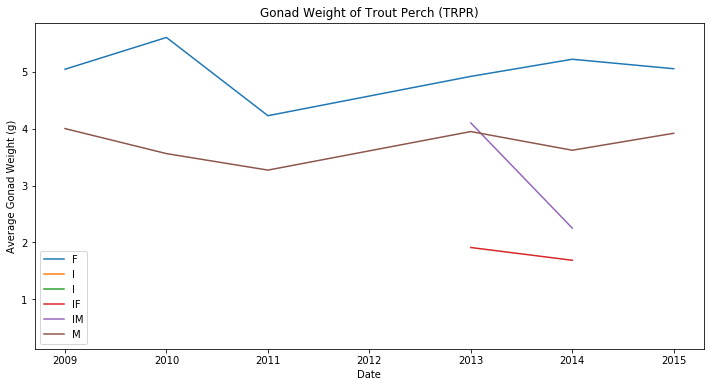

In [69]:
#Generate Length data
column = 'Total Weight (g)'
weight = FishHealth.groupby([FishHealth['Date'].dt.year, 'Sex'])[column].mean()
weight = weight.reset_index()

#Visalize weight data
plt.rcParams['figure.figsize'] = [12, 6]
fig, ax = plt.subplots(nrows = 1, ncols = 1)
for key, grp in weight.groupby(['Sex']):  
    #grp = pd.DataFrame(dates, columns=['Date']).merge(grp, how='left',on='Date')
    grp = grp.fillna(method='ffill')
    ax.plot(grp['Date'], grp[column], label=key) 

ax.set_title('Gonad Weight of ' + FishHealth.iloc[0]["Species"])
ax.set_xlabel('Date')
ax.set_ylabel('Average Gonad Weight (g)')
plt.legend(loc='best')    
plt.show()